In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import seaborn as sns


## READ and ORGANISE DATA

In [2]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', sep=',',  encoding="latin1", header=None)  

/var/folders/l8/19tfssl57w72c3vgx796cmb80000gp/T/ipykernel_22735/3328120990.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AMI_GSE66360_series_matrix.csv', sep=',',  encoding="latin1", header=None)


In [12]:
df_gex = df.iloc[61:]
cols = df.iloc[60].tolist()
cols[0] = "gene_names"
df_gex.columns = cols
df_gex = df_gex.reset_index(drop=True)

df_labels = df.iloc[59:61, 1:]
df_labels.index = ['Class', 'sample_ID']
df_labels = df_labels.T
#df_labels= df_labels.set_index("sample_ID")
#df_labels = df_labels.reset_index()

In [4]:
df_gex

,gene_names,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
2,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
3,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
4,1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
54671,AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
54672,AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
54673,AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


In [13]:
df_labels

,Class,sample_ID
1,H,GSM1620819
2,H,GSM1620820
3,H,GSM1620821
4,H,GSM1620822
5,H,GSM1620823
...,...,...
95,M,GSM1620913
96,M,GSM1620914
97,M,GSM1620915
98,M,GSM1620916


# ANALYSIS

High level description of the data and some pre-processing 

In [6]:
print("number of genes profiled:", df_gex.shape[0])
print("number of samples profiled:", df_gex.shape[1] - 1)

print("number of diseased samples:", sum(df_labels['Class'] == 'M') )
print("number of healthy samples:", sum(df_labels['Class'] == 'H'))


number of genes profiled: 54675
number of samples profiled: 99
number of diseased samples: 49
number of healthy samples: 50


In [7]:
#find missing genes
missing_entries = df_gex[df_gex.isnull().sum(axis=1) > 0]
print("genes with missing entries:", missing_entries.shape[0])

gex = df_gex.drop(missing_entries.index)
print("number of genes after removing missing entries:", gex.shape[0])
gex

genes with missing entries: 47
number of genes after removing missing entries: 54628


,gene_names,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
2,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
3,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
4,1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
54671,AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
54672,AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
54673,AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


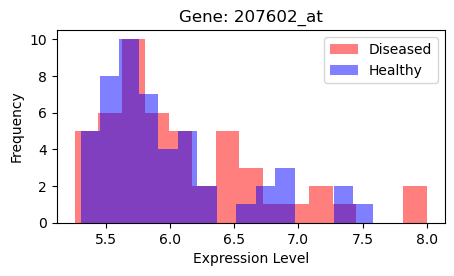

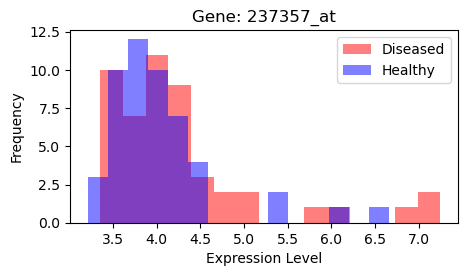

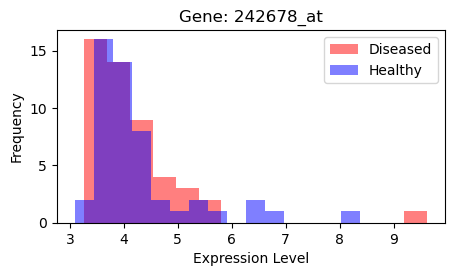

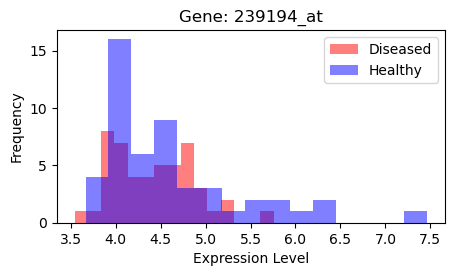

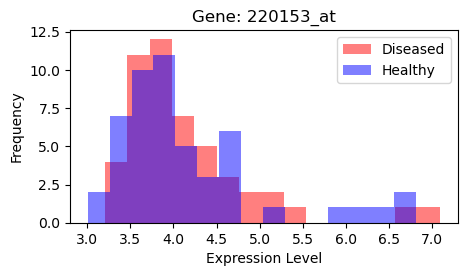

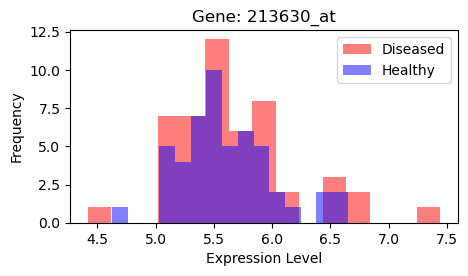

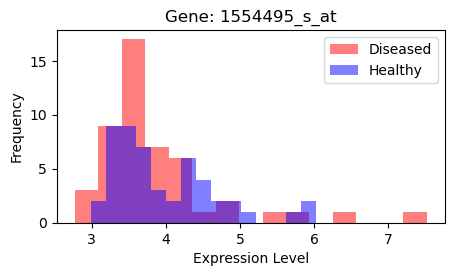

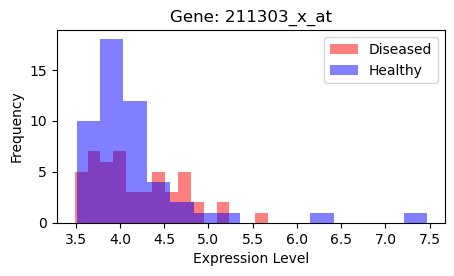

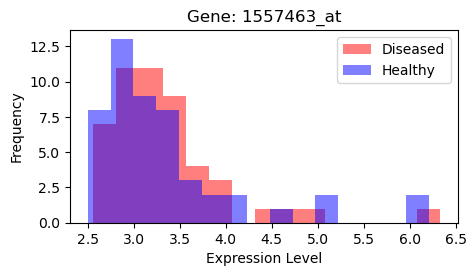

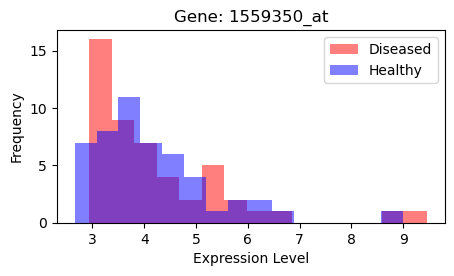

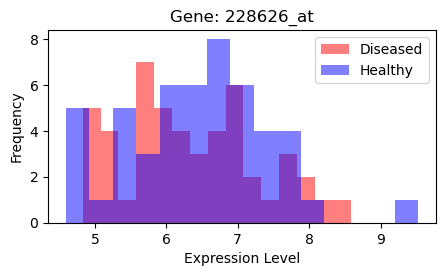

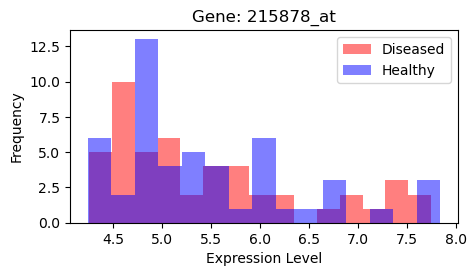

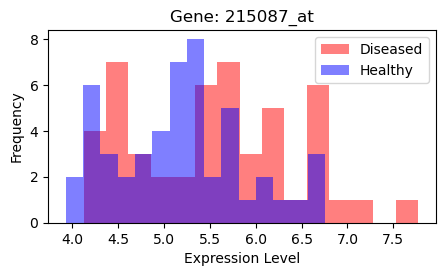

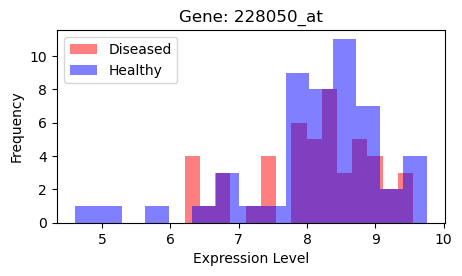

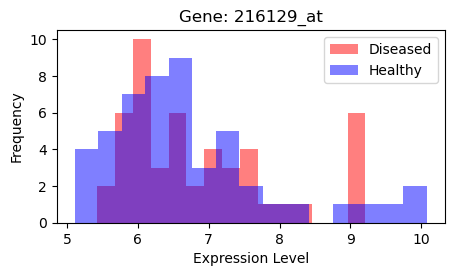

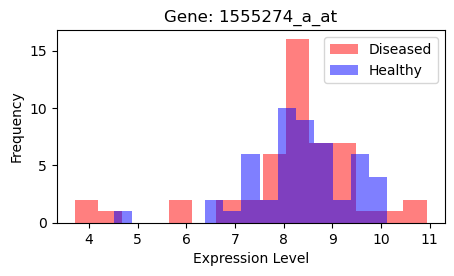

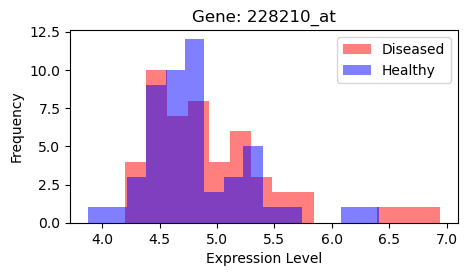

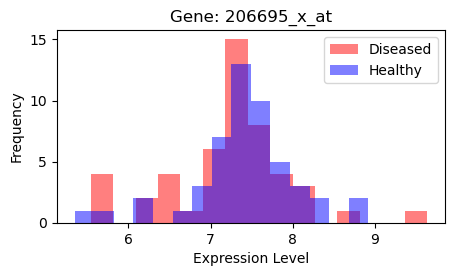

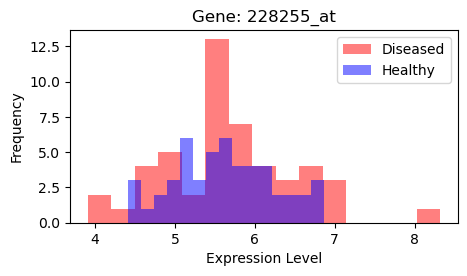

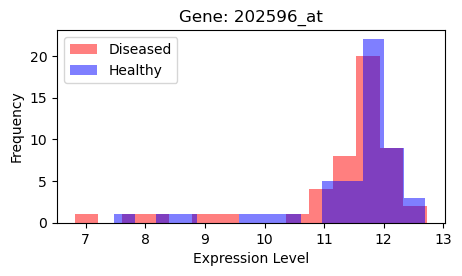

In [8]:
np.random.seed(42)
genes_randSelect = np.random.choice(gex.index, size=20, replace=False)

#make 20 histograms comparing diseased vs healthy for these randomly selected genes

for gene_idx in genes_randSelect:
    gene_name = gex.loc[gene_idx, 'gene_names']
    diseased_values = gex.loc[gene_idx, df_labels[df_labels['Class'] == 'M']['sample_ID'].values]
    healthy_values = gex.loc[gene_idx, df_labels[df_labels['Class'] == 'H']['sample_ID'].values]
    
    plt.figure(figsize=(5,2.5))
    plt.hist(diseased_values.astype(float), alpha=0.5, label='Diseased', bins=15, color='red')
    plt.hist(healthy_values.astype(float), alpha=0.5, label='Healthy', bins=15, color='blue')
    plt.title(f'Gene: {gene_name}')
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

We have many (around 55k) genes, and 100 samples. Each of these 100 samples have the label of M or H. We need to calculate the rank sum of M in each gene. Then make a histogram of this value.

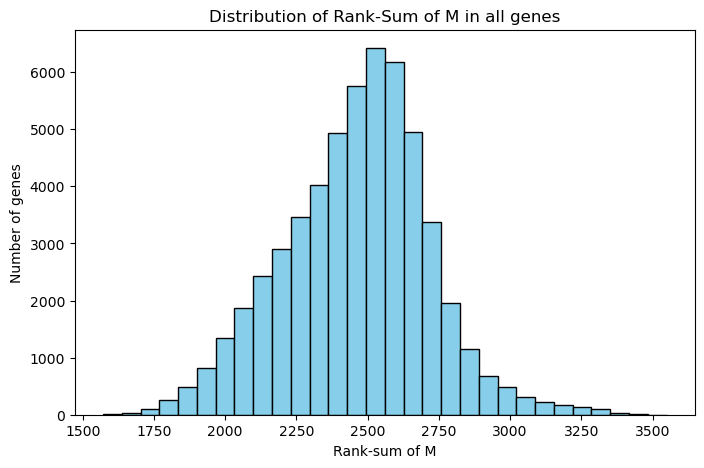

In [15]:
from scipy.stats import mannwhitneyu

total_samples = len(df_labels)
m_samples = sum(df_labels['Class'] == 'M')

# set index for easy alignment- run only once
df_labels = df_labels.set_index("sample_ID")

# reorder labels to match gex columns
labels_ordered = df_labels.loc[gex.columns[1:], "Class"]

RS_M_list = []

for gene in gex.index:
    values = gex.loc[gene, gex.columns[1:]]   # this is a Series, length = number of samples
    
    # split by class
    M_vals = pd.to_numeric(values[labels_ordered == "M"], errors="coerce")
    H_vals = pd.to_numeric(values[labels_ordered == "H"], errors="coerce")
    
    # Mann-Whitney U statistic for M (not H)
    u, p = mannwhitneyu(M_vals, H_vals, alternative="two-sided")

    # we know the min RS for M, so we can calculate the RS by adding minRS to U
    #RS_M = u + m_samples * (m_samples + 1) / 2
    RS_M_curr = u + (m_samples * (m_samples + 1) / 2)
    
    RS_M_list.append(RS_M_curr)  # or store p if you want

RS_M_list = pd.Series(RS_M_list, index=gex.index, name="U_stat")


plt.figure(figsize=(8,5))
plt.hist(RS_M_list, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Rank-sum of M")
plt.ylabel("Number of genes")
plt.title("Distribution of Rank-Sum of M in all genes")
plt.show()


# Differential Expression Analysis


In [16]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu

p_genes = pd.DataFrame(index=gex.index)
#pd.DataFrame(index=gex.gene_names) gives error 
for gene in gex.index:
    values = gex.loc[gene, gex.columns[1:]]   # this is a Series, length = number of samples

    # split by class
    M_vals = pd.to_numeric(values[labels_ordered == "M"], errors="coerce")
    H_vals = pd.to_numeric(values[labels_ordered == "H"], errors="coerce")
    
    # Mann-Whitney U statistic for M (not H)
    _, p_WRS_overexp = mannwhitneyu(M_vals, H_vals, alternative="greater")
    _, p_WRS_underexp = mannwhitneyu(M_vals, H_vals, alternative="less")

    # ttest p-values
    _, p_ttest_overexp = stats.ttest_ind(M_vals, H_vals, alternative="greater", nan_policy='omit')
    _, p_ttest_underexp = stats.ttest_ind(M_vals, H_vals, alternative="less", nan_policy='omit')

    p_genes.loc[gene, "p_WRS_overexp"] = p_WRS_overexp
    p_genes.loc[gene, "p_WRS_underexp"] = p_WRS_underexp
    p_genes.loc[gene, "p_ttest_overexp"] = p_ttest_overexp
    p_genes.loc[gene, "p_ttest_underexp"] = p_ttest_underexp

print("number of genes with WRS overexpression p-value <= 0.05:", sum(p_genes['p_WRS_overexp'] <= 0.05))
print("number of genes with WRS underexpression p-value <= 0.05:", sum(p_genes['p_WRS_underexp'] <= 0.05))
print("number of genes with t-test overexpression p-value <= 0.05:", sum(p_genes['p_ttest_overexp'] <= 0.05))
print("number of genes with t-test underexpression p-value <= 0.05:", sum(p_genes['p_ttest_underexp'] <= 0.05))

p_genes

number of genes with WRS overexpression p-value <= 0.05: 9010
number of genes with WRS underexpression p-value <= 0.05: 9474
number of genes with t-test overexpression p-value <= 0.05: 7067
number of genes with t-test underexpression p-value <= 0.05: 7467


,p_WRS_overexp,p_WRS_underexp,p_ttest_overexp,p_ttest_underexp
0,0.847386,0.154271,0.897953,0.102047
1,0.141349,0.860213,0.327719,0.672281
2,0.000009,0.999991,0.000053,0.999947
3,0.265536,0.736753,0.459246,0.540754
4,0.150969,0.850664,0.315798,0.684202
...,...,...,...,...
54670,0.011363,0.988844,0.135212,0.864788
54671,0.013867,0.986379,0.169314,0.830686
54672,0.058071,0.942737,0.147767,0.852233
54673,0.071298,0.929651,0.269218,0.730782


# Correlations Analysis

In [17]:
overexp = p_genes["p_WRS_overexp"].nsmallest(60)
underexp = p_genes["p_WRS_underexp"].nsmallest(60)
print("Top 60 overexpressed genes based on WRS p-value:")
print(overexp.index)
print("p-values:")
print(overexp)
print("Top 60 underexpressed genes based on WRS p-value:")
print(underexp.index)
print("p-values:")
print(underexp)

Top 60 overexpressed genes based on WRS p-value:
Index([18284, 25540, 14069, 53304, 13334, 13335, 26489, 13021, 50528, 49352,
       20708, 18283, 20645, 19821, 27844, 25307, 32213, 14068, 15074, 54302,
       14850, 25528,  2112, 13268, 25308, 15310, 14686,   368, 54090, 14067,
       10979, 25282, 26876, 13155, 44785, 12120, 29318, 13300, 14684,  4137,
       14355, 11411, 32496, 19550, 21232,  8878, 11290, 32873, 14621, 48334,
       31011, 10921, 11945, 29370, 14923, 16720, 14514, 11912, 20787,  2469],
      dtype='int64')
p-values:
18284    7.478568e-15
25540    9.303580e-15
14069    1.029027e-13
53304    2.487235e-13
13334    2.756846e-13
13335    2.756846e-13
26489    3.562756e-13
13021    6.236897e-13
50528    1.261298e-12
49352    2.289370e-12
20708    2.405222e-12
18283    2.928890e-12
20645    5.014621e-12
19821    5.525410e-12
27844    6.088832e-12
25307    6.390808e-12
32213    7.387476e-12
14068    8.133731e-12
15074    8.535888e-12
54302    1.588576e-11
14850    1.665761

Of those genes that significantly differ between M and H, we want to see if they behave coherently across all samples. For example, 2 genes are highly correlated if they both have high/low values for the same samples. 

We expect to see the M upregulated genes to have high values in M and low values in H, and the different genes to be correlated to each other, and anti-correlated to the M downregulated genes. 

However, for our ML purpose, we hope that despite this overall trend, there are significant differences between the genes in each group. 

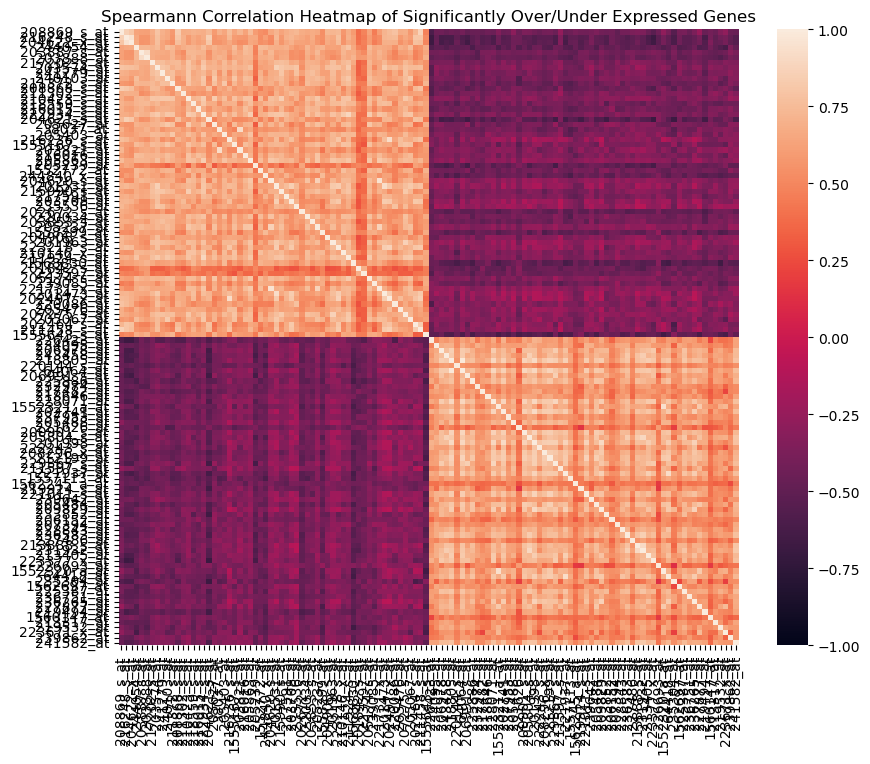

In [18]:
signif_genes = list(overexp.index) + list(underexp.index)
gex_signif = gex.loc[signif_genes]

plt.figure(figsize=(10,8))
sns.heatmap(gex_signif.T[1:].corr('spearman'), xticklabels=gex_signif.gene_names, yticklabels=gex_signif.gene_names, vmax=1, vmin=-1)
plt.title('Spearmann Correlation Heatmap of Significantly Over/Under Expressed Genes')
plt.show()



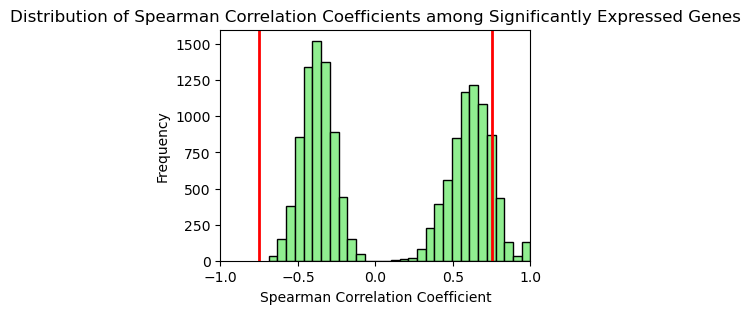

number of genes with significant correlation positive: 488.0
number of genes with significant correlation negative: 0.0


In [19]:
plt.figure(figsize=(4,3))
plt.hist(gex_signif.T[1:].corr('spearman').values.flatten(), bins=30, color="lightgreen", edgecolor="black")
plt.xlabel("Spearman Correlation Coefficient")
plt.xlim(-1, 1)
plt.axvline(x=-0.75, color='red', linestyle='-', linewidth=2)
plt.axvline(x=0.75, color='red', linestyle='-', linewidth=2)
plt.ylabel("Frequency")
plt.title("Distribution of Spearman Correlation Coefficients among Significantly Expressed Genes")
plt.show()

g =((gex_signif.T[1:].corr('spearman')>0.75) & (gex_signif.T[1:].corr('spearman')<1))
print("number of genes with significant correlation positive:", g.sum().sum()/2)

g =gex_signif.T[1:].corr('spearman')<-0.75
print("number of genes with significant correlation negative:", (g.sum().sum())/2)

# Machine Learning Classifiers

In [23]:
#Split the dataset into a 80/20 train/test random split

from sklearn.model_selection import train_test_split


train_val_data, test_data = train_test_split(gex_signif.T.drop(index="gene_names"), test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
print("train_data size:", train_data.shape)
print("val_data size:", val_data.shape)
print("test_data size:", test_data.shape)

train_data size: (59, 120)
val_data size: (20, 120)
test_data size: (20, 120)


In [24]:
train_data

,18284,25540,14069,53304,13334,13335,26489,13021,50528,49352,...,46000,45514,37131,28778,5194,22618,28816,32947,49111,50831
GSM1620884,9.231998,9.817684,10.945432,8.862479,6.424207,6.345074,7.87705,10.761898,8.447437,11.390708,...,7.71606,8.788293,9.072597,6.896387,5.367736649,6.814879,4.886686,8.764083,6.834495,6.61544
GSM1620871,8.335727,3.532942,5.955067,7.781316,6.86284,7.03381,6.303537,6.563106,4.804661,5.781806,...,9.367452,10.586912,11.058189,7.582178,6.689348564,7.246319,9.672367,10.729046,8.50001,10.494363
GSM1620852,9.300638,8.62223,9.432322,10.352175,8.480879,8.80932,9.094353,10.795864,8.978971,11.374092,...,6.887218,10.130178,9.269121,6.526091,4.862680058,6.511135,4.103222,8.125079,6.489071,6.141469
GSM1620880,9.455963,10.169151,10.843267,10.808078,10.656913,10.961615,9.703342,12.258373,9.76773,10.912093,...,7.266386,9.800729,9.377373,5.308434,5.124142157,5.259361,6.353567,10.142217,4.70863,7.880254
GSM1620896,8.888889,9.666315,10.408514,8.209345,4.64826,4.226148,6.229356,9.511103,6.168266,8.846818,...,9.157195,11.228822,9.485128,6.464413,7.769743847,6.873098,9.038729,9.792367,6.389018,8.025925
GSM1620848,8.30291,8.582181,9.224425,7.650889,5.416675,5.125499,7.410188,8.640803,6.379516,7.896521,...,9.199864,10.235589,9.674984,8.309733,6.750126328,8.31182,8.654708,9.868413,7.692766,8.807886
GSM1620862,7.893542,3.982031,5.861633,5.18324,5.237488,5.049665,6.342692,5.910656,4.821876,4.304065,...,8.701406,10.652863,10.825764,7.334426,6.710429257,7.569582,8.217162,10.703698,6.828081,8.847258
GSM1620876,7.810407,5.378623,6.455843,6.748154,5.003997,4.052243,5.818345,7.313556,6.080624,5.327734,...,8.732111,10.692876,10.729362,8.44315,5.539522786,8.283742,8.337238,10.627971,6.933349,9.147512
GSM1620888,10.378714,11.77472,12.312497,8.364907,6.775554,6.543819,7.195754,9.972984,7.005308,8.768699,...,4.539357,9.105281,9.809538,4.53542,4.096558631,8.199441,8.377024,8.767057,6.712357,6.440515
GSM1620875,8.315916,5.716602,6.147845,6.631728,5.211284,5.06966,6.439214,6.724403,5.014605,5.96961,...,8.803344,10.27615,11.051039,8.251917,6.134707893,8.09267,8.931658,10.49539,8.036385,8.089578


In [31]:
# make it proper X_data and y_data

def prepare_data(train_data, val_data, test_data, df_labels):
    X_train = train_data.apply(pd.to_numeric, errors="coerce")
    X_val = val_data.apply(pd.to_numeric, errors="coerce")
    X_test = test_data.apply(pd.to_numeric, errors="coerce")

    y_train = df_labels.loc[X_train.index, "Class"]
    y_val = df_labels.loc[X_val.index, "Class"]
    y_test = df_labels.loc[X_test.index, "Class"]
    return X_train, X_val, X_test, y_train, y_val, y_test

# Decision tree classifier + hyperparameter tuning

In [ ]:
# lets try to tune the decision tree classifier hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(train_data, val_data, test_data, df_labels)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred)
f1_val = f1_score(y_val, y_pred, pos_label='M')

In [30]:
print("Validation Accuracy of best Decision Tree Classifier:", accuracy_val)
print("Validation F1 Score of best Decision Tree Classifier:", f1_val)
print("Best Hyperparameters:", grid_search.best_params_)


y_pred = best_dtc.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, pos_label='M')

print("Test Accuracy of the best Decision Tree Classifier:", accuracy_test)
print("Test F1 Score of the best Decision Tree Classifier:", f1_test)  

Validation Accuracy of best Decision Tree Classifier: 0.95
Validation F1 Score of best Decision Tree Classifier: 0.9411764705882353
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy of the best Decision Tree Classifier: 0.85
Test F1 Score of the best Decision Tree Classifier: 0.8235294117647058


In [ ]:
# what if i used all genes and not just the significant ones? decision tree

train_val_data_big, test_data_big = train_test_split(gex.T.drop(index="gene_names"), test_size=0.2, random_state=42)
train_data_big, val_data_big = train_test_split(train_val_data_big, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

X_train_big, X_val_big, X_test_big, y_train_big, y_val_big, y_test_big = prepare_data(train_data_big, val_data_big, test_data_big, df_labels)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)
grid_search.fit(X_train_big, y_train_big)
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_val_big)
accuracy_val = accuracy_score(y_val_big, y_pred)
f1_val = f1_score(y_val_big, y_pred, pos_label='M')

In [35]:
print("train_data size:", train_data_big.shape)
print("val_data size:", val_data_big.shape)
print("test_data size:", test_data_big.shape)

print("Validation Accuracy of best Decision Tree Classifier- all genes:", accuracy_val)
print("Validation F1 Score of best Decision Tree Classifier- all genes:", f1_val)
print("Best Hyperparameters:", grid_search.best_params_)


y_pred = best_dtc.predict(X_test_big)
accuracy_test = accuracy_score(y_test_big, y_pred)
f1_test = f1_score(y_test_big, y_pred, pos_label='M')

print("Test Accuracy of the best Decision Tree Classifier- all genes:", accuracy_test)
print("Test F1 Score of the best Decision Tree Classifier- all genes:", f1_test)  

train_data size: (59, 54628)
val_data size: (20, 54628)
test_data size: (20, 54628)
Validation Accuracy of best Decision Tree Classifier- all genes: 0.9
Validation F1 Score of best Decision Tree Classifier- all genes: 0.8888888888888888
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy of the best Decision Tree Classifier- all genes: 0.85
Test F1 Score of the best Decision Tree Classifier- all genes: 0.8421052631578947


# Linear classifier + hyperparameter tuning

In [ ]:
# what if i used a linear classifier? 
# select hyperparameters that work best on validation set

from sklearn.linear_model import LogisticRegression

hyperparameters = [
    {'C': 0.01, 'penalty': 'l2'},
    {'C': 0.1, 'penalty': 'l2'},
    {'C': 1, 'penalty': 'l2'},
    {'C': 10, 'penalty': 'l2'},
    {'C': 100, 'penalty': 'l2'},
    {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
]

best_f1 = 0
best_params = None

for params in hyperparameters:  
    lr = LogisticRegression(random_state=42, **params, max_iter=1000)
    lr.fit(X_train, y_train)
    y_val_pred = lr.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, pos_label='M')
    if f1 > best_f1:
        best_f1 = f1
        best_params = params



Best Hyperparameters on validation set: {'C': 1, 'penalty': 'l2'}
Test Set Accuracy: 0.95
Test Set F1-score: 0.9473684210526315
Validation Set Accuracy: 1.0
Validation Set F1-score: 1.0


/Applications/miniforge3/envs/ml-reichman-new/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


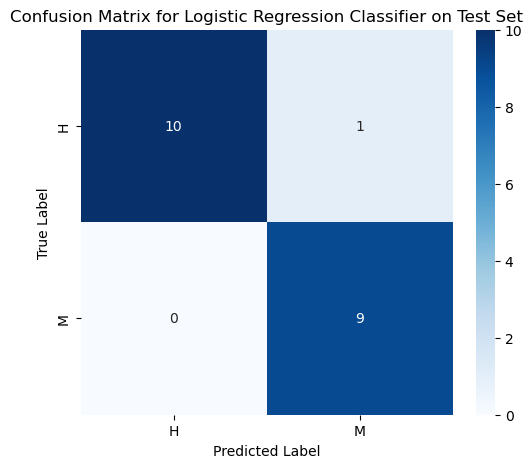

In [37]:
# calculate accuracy and f1 on test set and compare to validation set
# make confusion matrix of test

from sklearn.metrics import confusion_matrix

print("Best Hyperparameters on validation set:", best_params)
lr_best = LogisticRegression(random_state=42, **best_params, max_iter=1000)

lr_best.fit(X_train, y_train)
y_pred_test = lr_best.predict(X_test)
y_pred_val = lr_best.predict(X_val)

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, pos_label='M')
print("Test Set Accuracy:", accuracy)
print("Test Set F1-score:", f1)

accuracy_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val, pos_label='M')
print("Validation Set Accuracy:", accuracy_val)
print("Validation Set F1-score:", f1_val)

plt.figure(figsize=(6,5))
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'M'], yticklabels=['H', 'M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier on Test Set')
plt.show()

In [ ]:
# what about all genes with logistic regression?

best_f1 = 0
best_params = None

for params in hyperparameters:  
    lr = LogisticRegression(random_state=42, **params, max_iter=1000)
    lr.fit(X_train_big, y_train_big)
    y_val_pred = lr.predict(X_val_big)
    f1 = f1_score(y_val_big, y_val_pred, pos_label='M')
    if f1 > best_f1:
        best_f1 = f1
        best_params = params


Best Hyperparameters on validation set: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy: 0.9
Test Set F1-score: 0.875
Validation Set Accuracy: 0.95
Validation Set F1-score: 0.9473684210526315


/Applications/miniforge3/envs/ml-reichman-new/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Applications/miniforge3/envs/ml-reichman-new/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


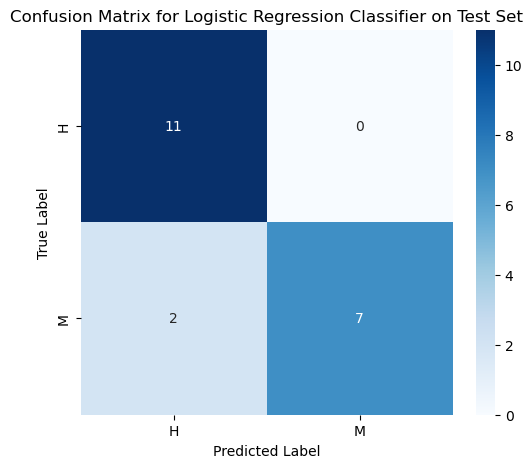

In [39]:
print("Best Hyperparameters on validation set:", best_params)
lr_best = LogisticRegression(random_state=42, **best_params, max_iter=1000)

lr_best.fit(X_train, y_train)
y_pred_test = lr_best.predict(X_test)
y_pred_val = lr_best.predict(X_val)

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, pos_label='M')
print("Test Set Accuracy:", accuracy)
print("Test Set F1-score:", f1)

accuracy_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val, pos_label='M')
print("Validation Set Accuracy:", accuracy_val)
print("Validation Set F1-score:", f1_val)

plt.figure(figsize=(6,5))
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'M'], yticklabels=['H', 'M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier on Test Set')
plt.show()

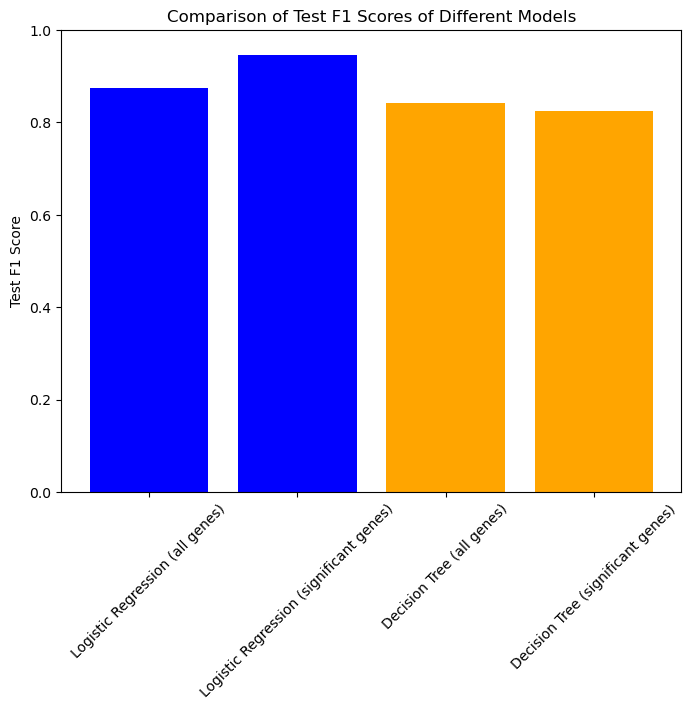

In [42]:
# compare all the F1 scores to find the best model


#[["Test F1 score of best Linear Regression- all genes:", 0.875]
#["Test F1 score of best Linear Regression- significant genes:", 0.9473684210526315]
#["Test F1 Score of the best Decision Tree Classifier- all genes:", 0.8421052631578947]
#["Test F1 Score of the best Decision Tree Classifier- significant genes:", 0.8235294117647058]]

plt.figure(figsize=(8,6))
plt.bar(["Logistic Regression (all genes)", "Logistic Regression (significant genes)",
         "Decision Tree (all genes)", "Decision Tree (significant genes)"],
        [0.875, 0.947, 0.842, 0.824], color=['blue', 'blue', 'orange', 'orange'])
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel("Test F1 Score")
plt.title("Comparison of Test F1 Scores of Different Models")
plt.show()



In [43]:
# best model is logistic regression with significant genes
lr_best = LogisticRegression(random_state=42, **best_params, max_iter=1000)
lr_best.fit(X_train, y_train)

# save model
import joblib
joblib.dump(lr_best, 'best_logistic_regression_model.pkl')

/Applications/miniforge3/envs/ml-reichman-new/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Applications/miniforge3/envs/ml-reichman-new/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


['best_logistic_regression_model.pkl']

In [48]:
# list the significant genes used in the model
signif_genes
genes_used = df_gex.loc[signif_genes, 'gene_names']
genes_used.to_csv('significant_genes_used_in_model.csv')